In [1]:
import numpy as np

X = 2 * np.random.rand(100, 1)  # Create 100*1 numpy array
y = 4 + 3 * X + np.random.randn(100, 1)

* random.rand(): Create an array of the given shape and populate it with random samples from a uniform distribution over [0, 1).

* random.randn(): Return a sample (or samples) from the "standard normal" (Gaussian) distribution.

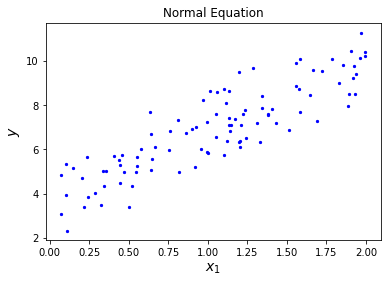

In [2]:
import matplotlib.pyplot as plt

plt.scatter(X, y, c='b', s=5)
plt.xlabel(r'$x_1$', fontsize=14)
plt.ylabel(r'$y$', fontsize=14)
plt.title('Normal Equation')
plt.show()

In [3]:
X_b = np.c_[np.ones((100, 1)), X]  # 모든 샘플에 x0 = 1을 추가
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [4]:
X_b.shape, theta_best.shape

((100, 2), (2, 1))

In [5]:
theta_best

array([[3.73740783],
       [3.07944845]])

## theta_best를 통해 예측해보기

In [6]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]

y_predict = X_new_b.dot(theta_best)

In [7]:
y_predict

array([[3.73740783],
       [9.89630473]])

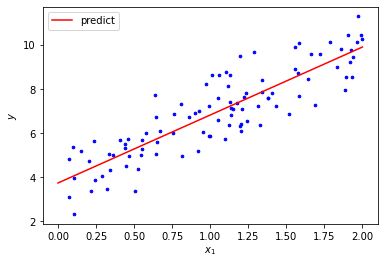

In [8]:
plt.plot(X_new, y_predict, "r-", label="predict")
plt.scatter(X, y, c="b", s=7)
plt.xlabel(r"$x_1$")
plt.ylabel(r"$y$")
plt.legend()
plt.show()

sklearn 선형 회귀 수행

In [9]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [10]:
lin_reg.intercept_, lin_reg.coef_

(array([3.73740783]), array([[3.07944845]]))

In [11]:
lin_reg.predict(X_new)

array([[3.73740783],
       [9.89630473]])

In [12]:
theta_best_svd, residuals, ranks, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.73740783],
       [3.07944845]])

In [13]:
np.linalg.pinv(X_b).dot(y)

array([[3.73740783],
       [3.07944845]])

### 정규방정식 Normal Equation
#### $\mathbf{\hat \theta} = (\mathbf{X^T} \cdot \mathbf{X})^{-1} \cdot \mathbf{X^T} \cdot \mathbf{y}$

### 유사역행렬 Pseudoinverse (또는 무어-펜로즈 역행렬 Moore-Penrose inverse)
#### $\mathbf{\hat \theta} = \mathbf{X^+} \cdot \mathbf{y}$

#### 정규방정식의 역행렬이 없다면 유사역행렬을 통해 theta 값을 구할 수 있다.

***

## 비용 함수 MSE를 이용한 경사하강법 (Gradient Descent)
### 비용 함수 MSE
###  $MSE(\mathbf{\theta}) = \frac{1}{m} \sum_{i=0}^m (\mathbf{\theta}^T \cdot \mathbf{x}^{(i)} - y^{(i)})^2$<br><br>
### 비용 함수의 gradient vector
### $\bigtriangledown_{\theta} MSE(\mathbf{\theta}) = \frac{2}{m} \mathbf{X}^T (\mathbf{X} \mathbf{\theta} - \mathbf{y})$<br><br>
### 경사하강법의 step
### $\mathbf{\theta}^{(next step)} = \mathbf{\theta} - \eta \bigtriangledown_{\theta} MSE(\mathbf{\theta})$

In [14]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [15]:
theta

array([[3.73740783],
       [3.07944845]])

In [24]:
X_new_b.dot(theta)

array([[3.73740783],
       [9.89630473]])

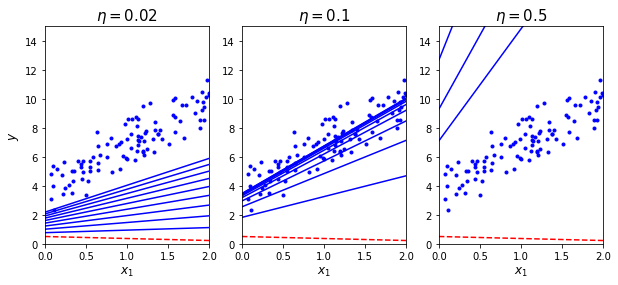

In [30]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel('$x_1$', fontsize=12)
    plt.axis([0, 2, 0, 15])
    plt.title('$\eta = {}$'.format(eta), fontsize=15)

np.random.seed(42)
theta = np.random.randn(2, 1)

plt.figure(figsize=(10,4))
plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel('$y$', fontsize=12)

plt.subplot(132)
plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.xlabel('$x_1$', fontsize=12)

plt.subplot(133)
plot_gradient_descent(theta, eta=0.5)

plt.show()